<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initial setup</a></span></li><li><span><a href="#Letting-it-run-longer" data-toc-modified-id="Letting-it-run-longer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Letting it run longer</a></span><ul class="toc-item"><li><span><a href="#ni-to-5000" data-toc-modified-id="ni-to-5000-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ni to 5000</a></span></li><li><span><a href="#ni-to-10000" data-toc-modified-id="ni-to-10000-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ni to 10000</a></span></li><li><span><a href="#Comparison-of-those-measures" data-toc-modified-id="Comparison-of-those-measures-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparison of those measures</a></span></li></ul></li><li><span><a href="#Change-the-initialization" data-toc-modified-id="Change-the-initialization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Change the initialization</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-measures" data-toc-modified-id="Comparing-two-measures-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Comparing two measures</a></span></li></ul></li></ul></div>

# Conclusion

# Goal

There are two main problems we have been dealing with: 
1. Computation time
2. The fact that the balance gets stuck

Here we want to work on the **second** one. Of course, both problems are deeply interlinked. 

We are realizing it stems essentially from the fact that we are limiting the inner iterations in progress. 

There are two ways we can help this: 
- let them run longer
- initialize better. 

We want to try both approaches here. 

**NOTE**: here all the experiments will be run without the update factor, whose goal is only to speed up computation. This is going to come later. 

# Load

In [7]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
subfolder='unstucking_balance'

Files: 
- initial setup: nothing has been changed
- ni_to_5000: ni is increased after a given iteration number
- improved_initialization: initialization is improved after a given iteration number

# Initial setup

Here we solve as before, just to control and provide a good baseline

In [9]:
n_nodes=10

In [10]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [11]:
print(os.listdir(path))

['new_init.pkl', 'ni_to_10000.pkl', 'initial_setup.pkl', 'ni_to_5000.pkl']


In [12]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

new_init.pkl


In [15]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

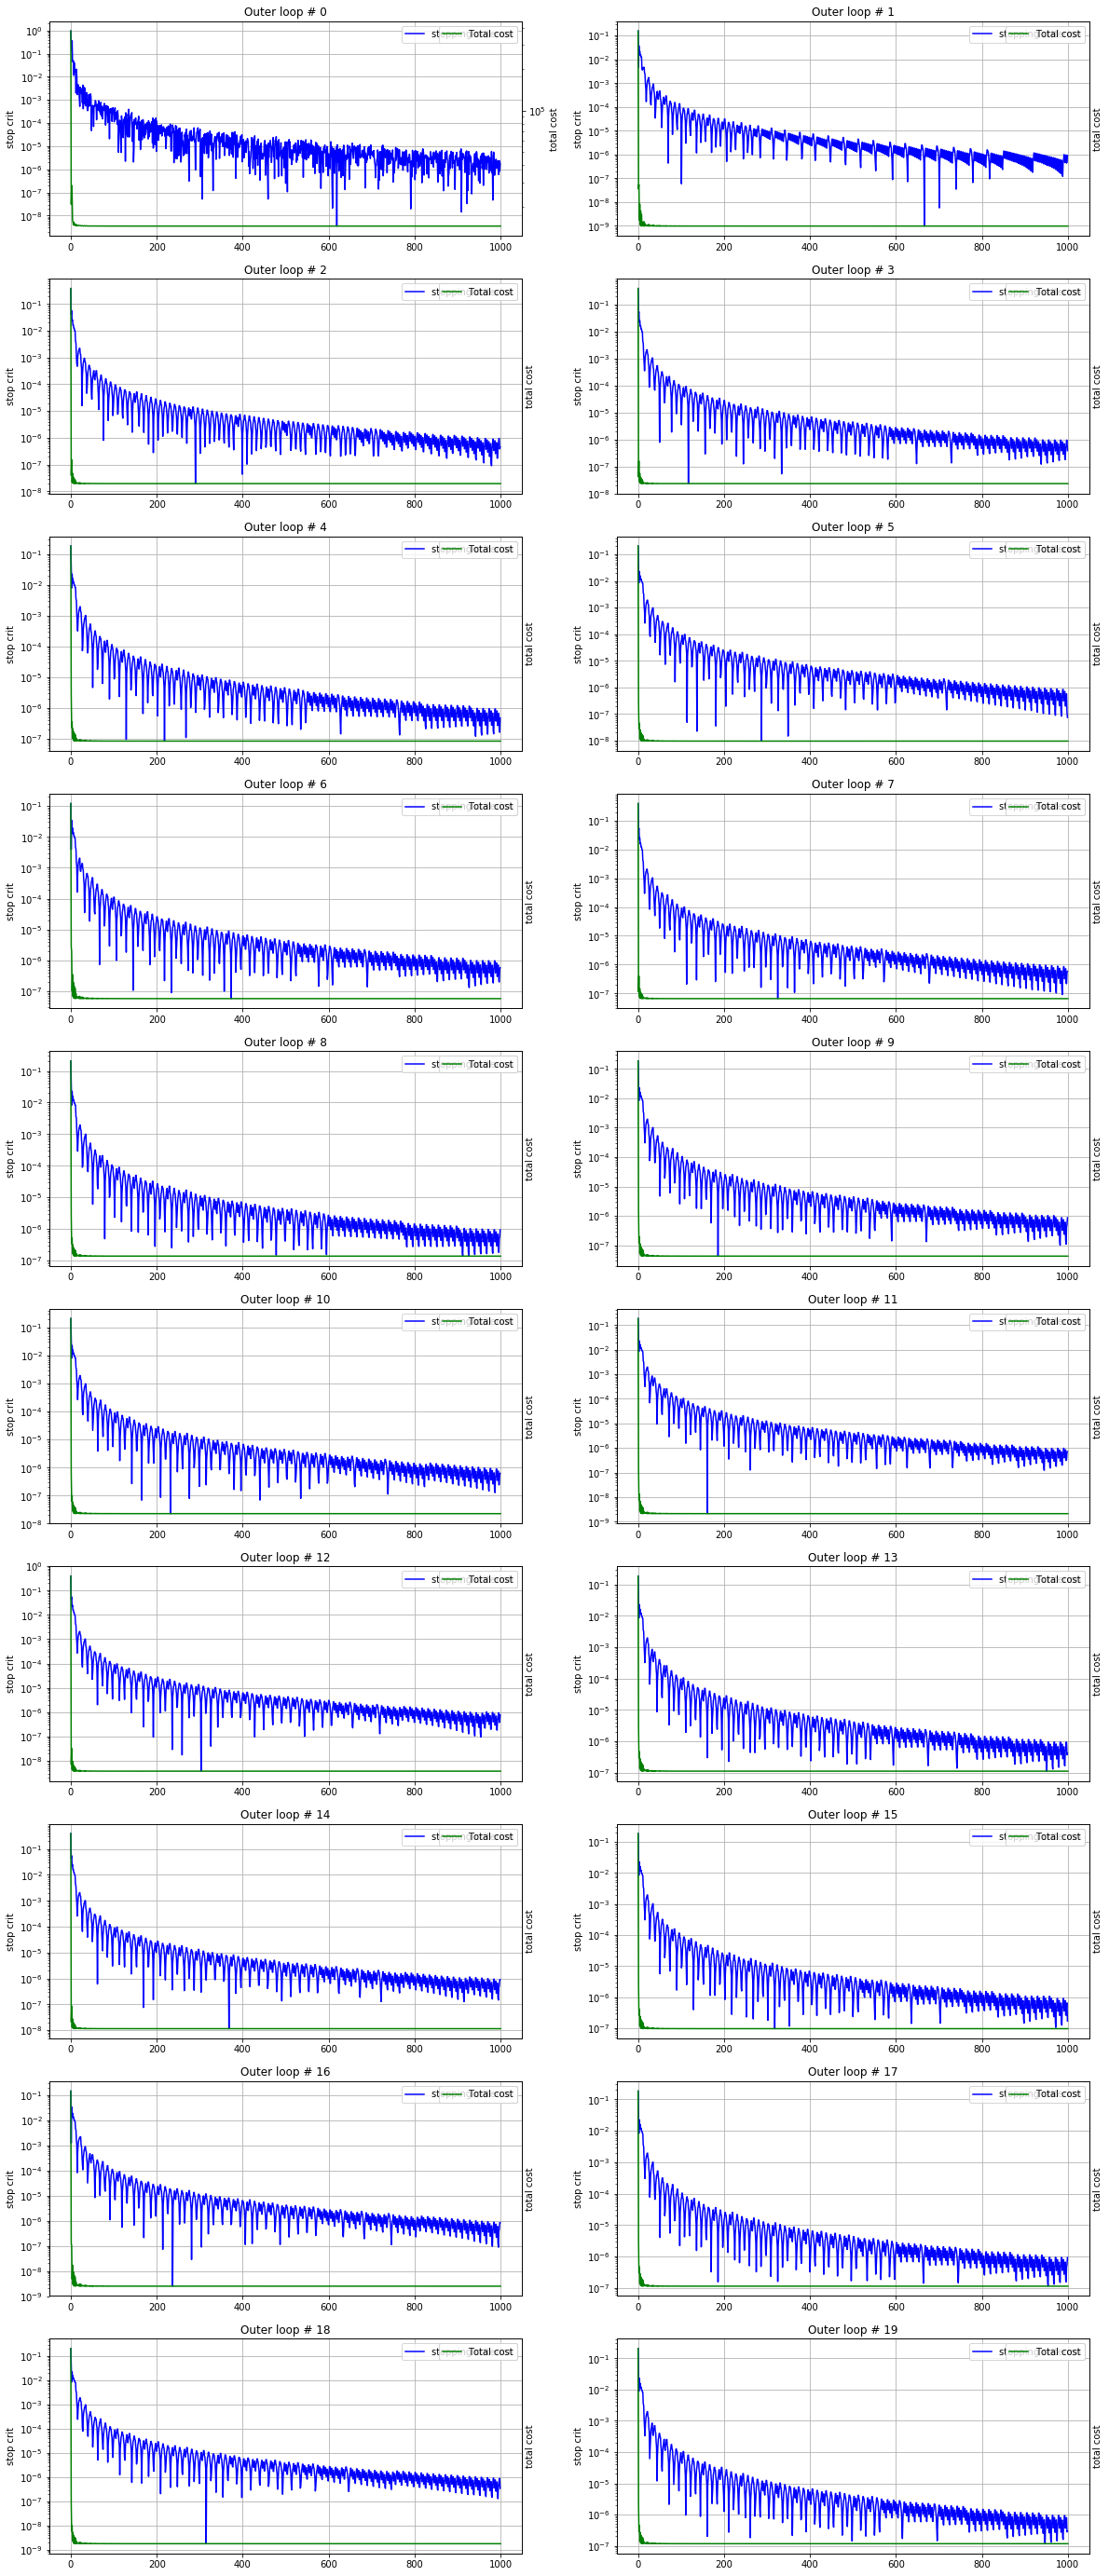

In [16]:
plot_stop_and_cost(opt_res)

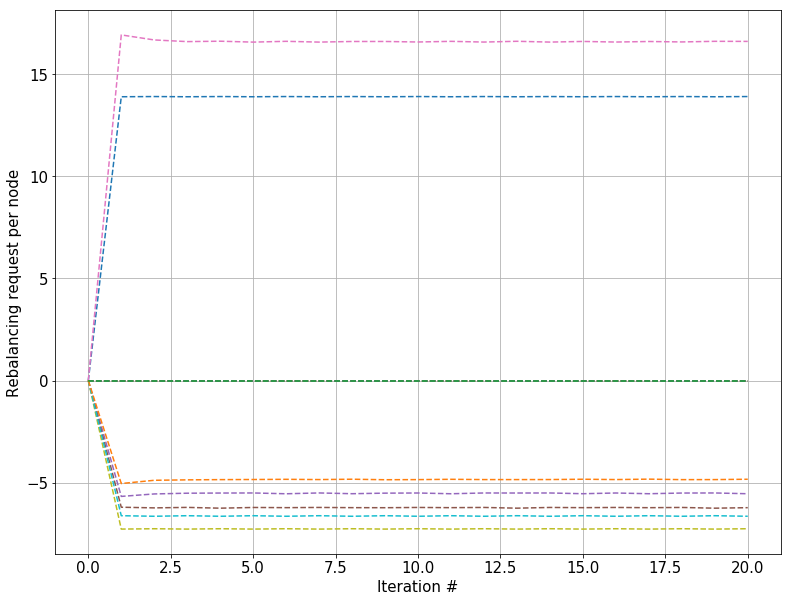

In [17]:
plot_ri_list(ri_FW, save = False, path = None)

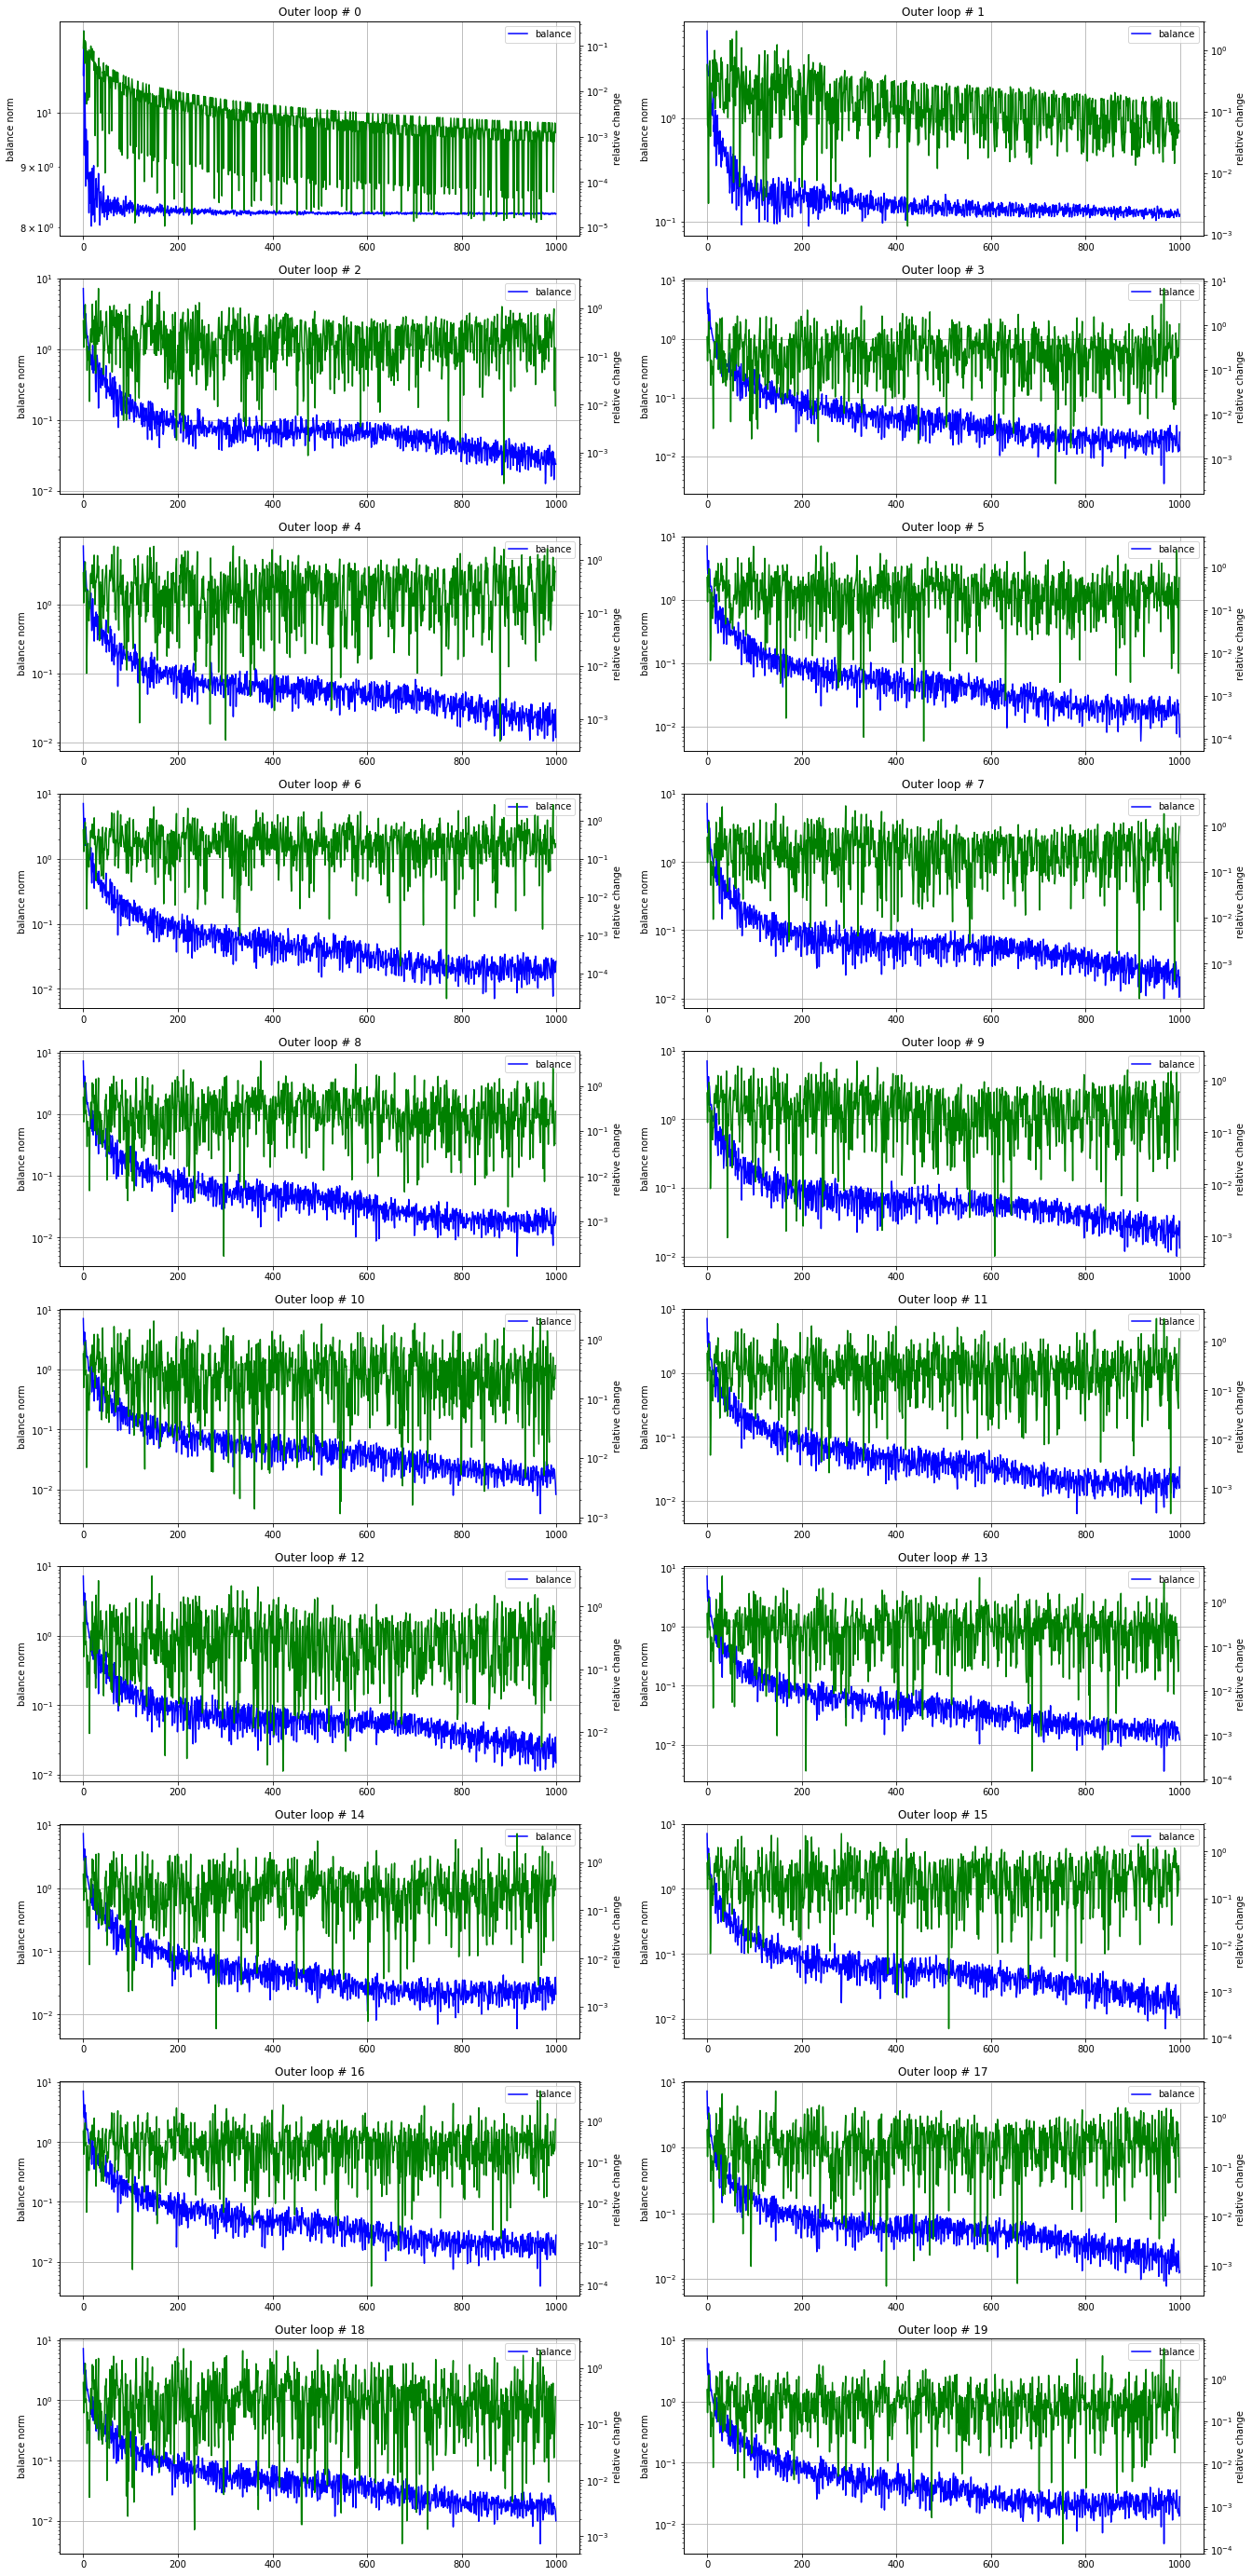

In [13]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

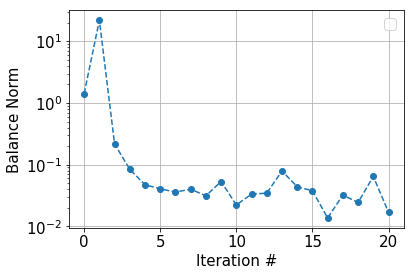

In [19]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

This is the control. We see indeed that the balance gets stuck after 5 or 6 iterations. We can see it in the balance graph because it would decrease more if we let it I think. 

# Letting it run longer

## ni to 5000

Here we jump ni (number of maximum inner iterations) to 5000 after iterations 10

In [20]:
n_nodes=10

In [21]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [22]:
print(os.listdir(path))

['initial_setup.pkl', 'ni_to_5000.pkl']


In [23]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

ni_to_5000.pkl


In [24]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

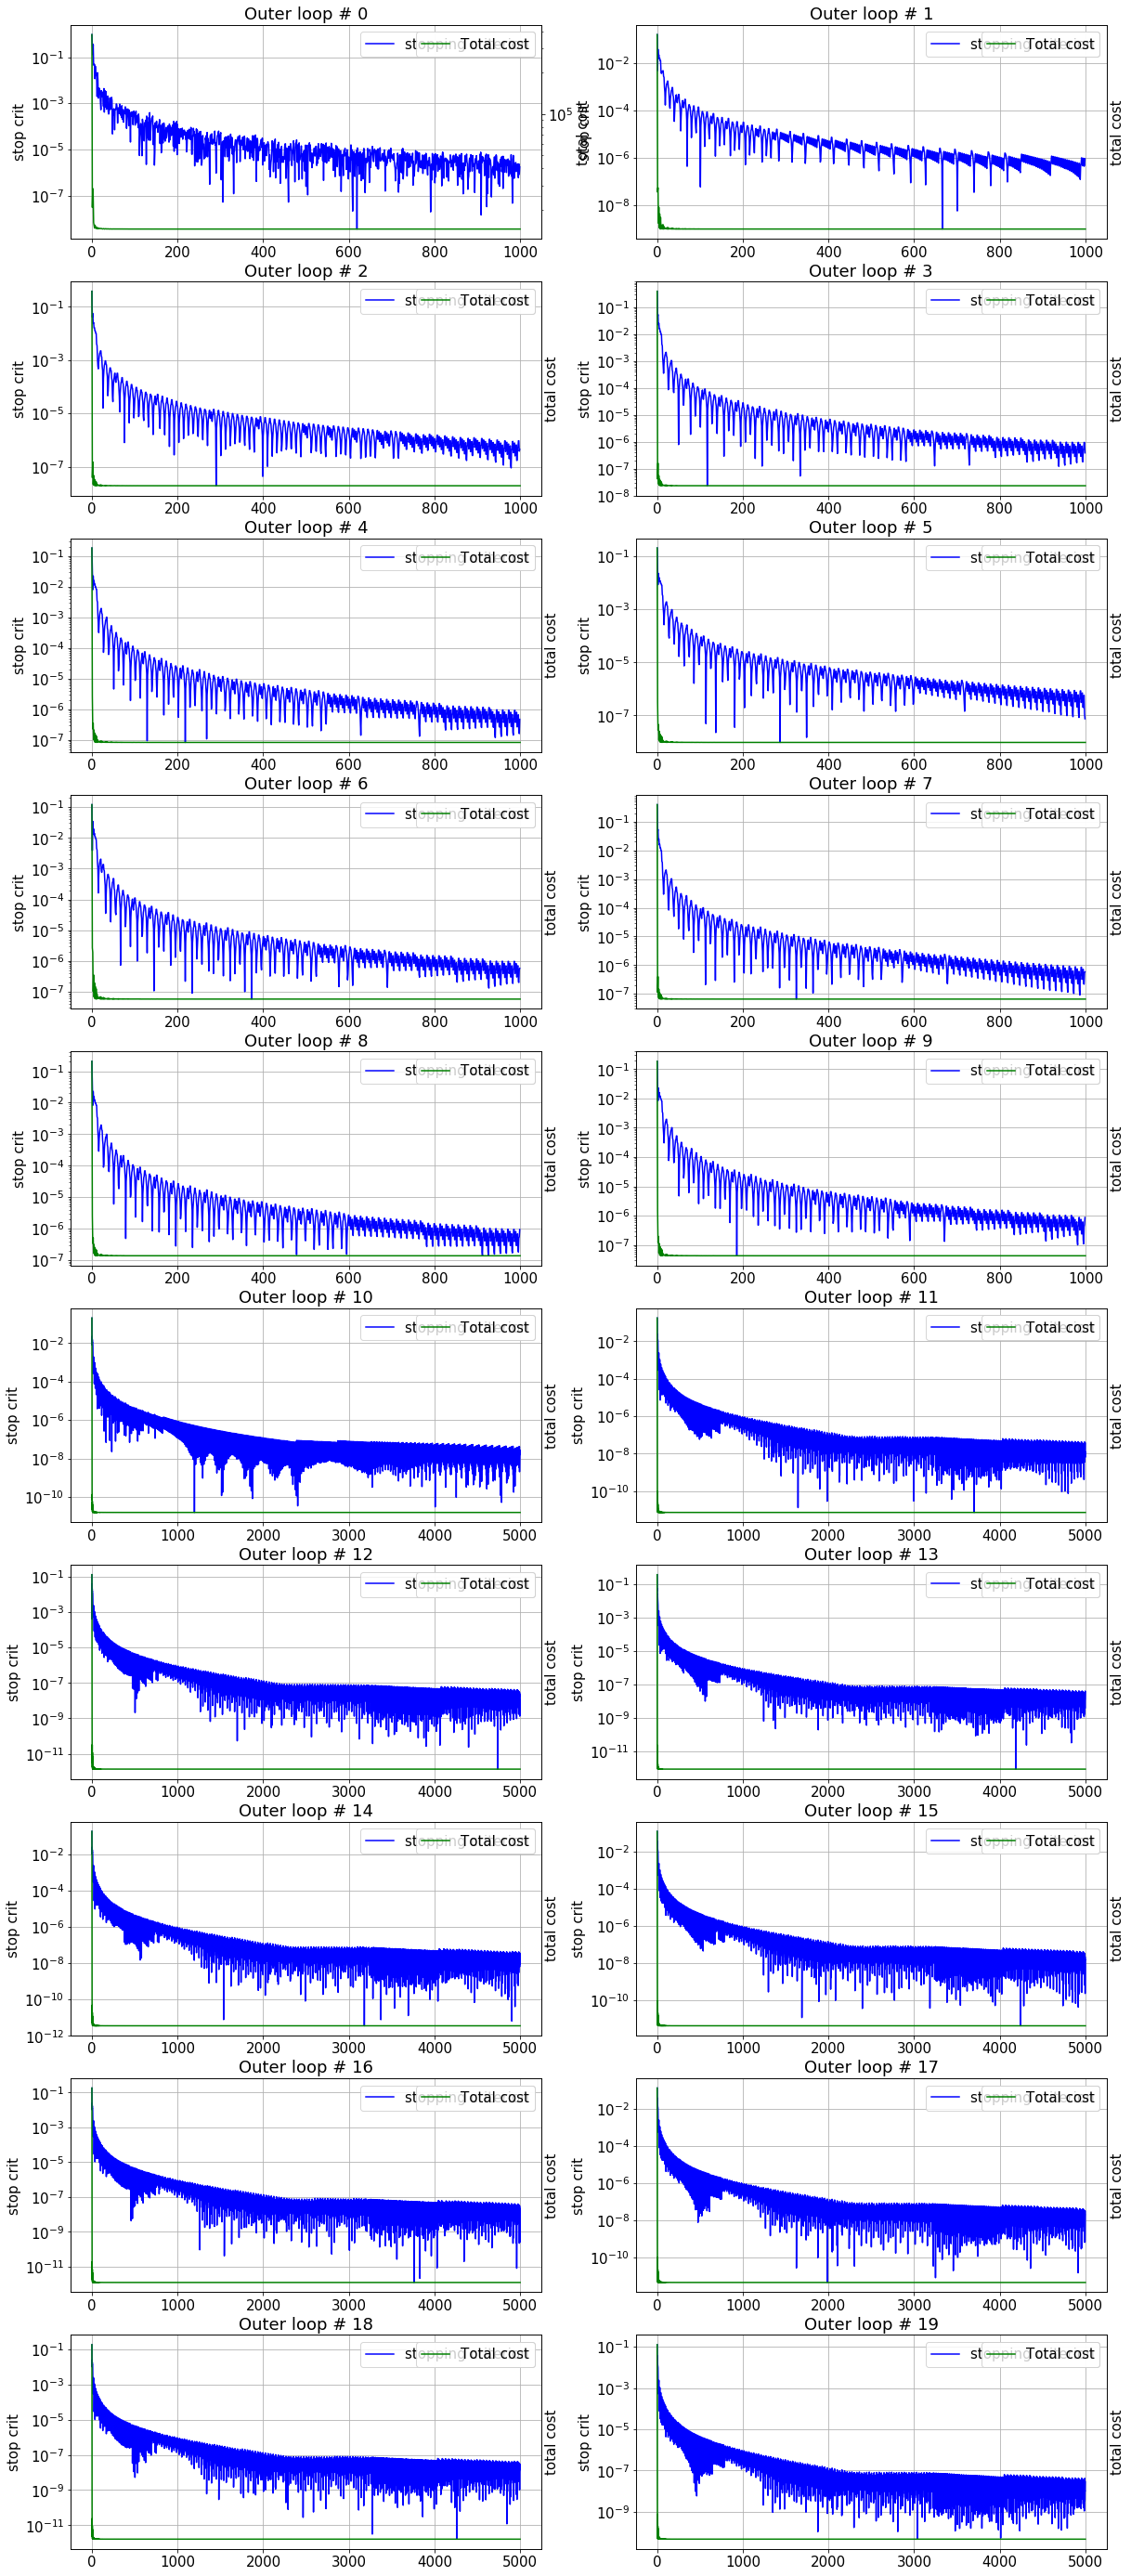

In [25]:
plot_stop_and_cost(opt_res)

We notice a small jump in some ri at 11 but then it keeps being very stable! 

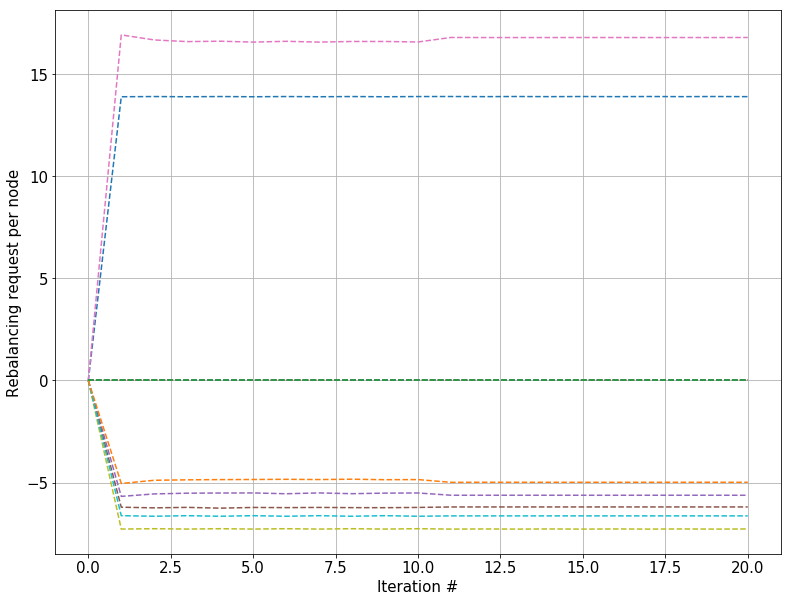

In [26]:
plot_ri_list(ri_FW, save = False, path = None)

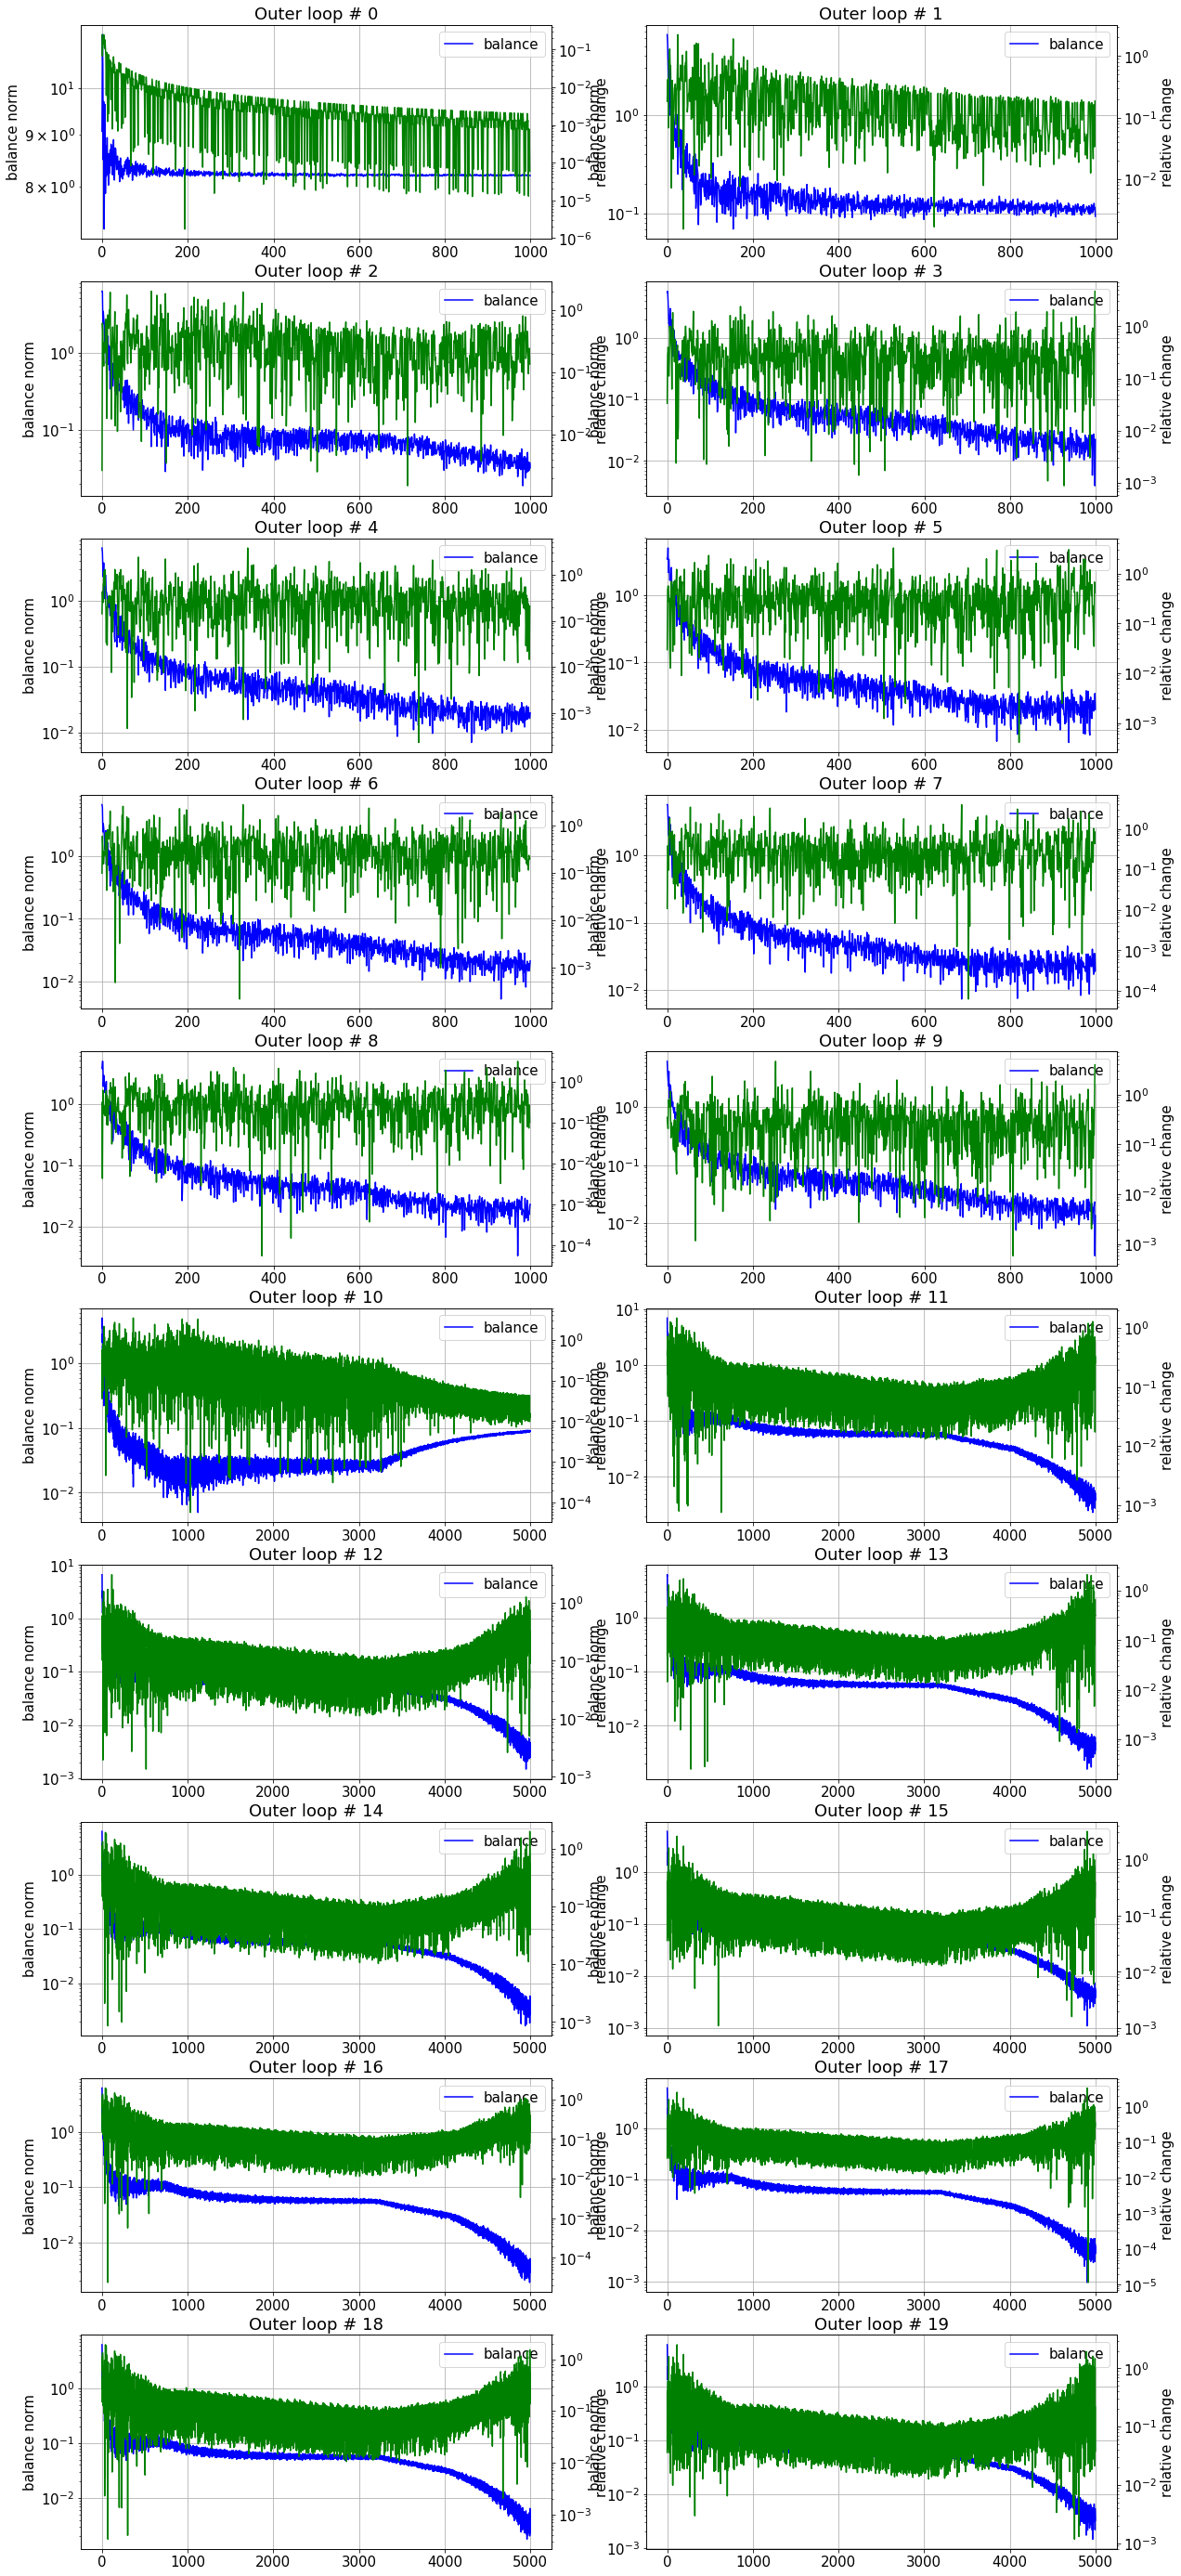

In [27]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

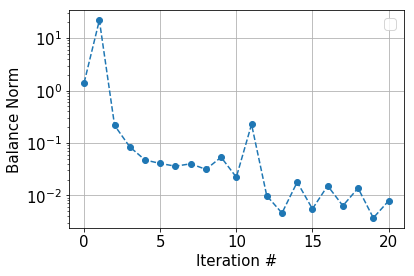

In [28]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

We clearly see an improvement after 10 iterations where we jump to slightly lower values of the balance. 

It is interesting to note the jump at iteration 11. Is that normal? 

I think so! Remember that you are never solving the right problem. And here you have been working to solving the same problem over a few iterations (as ri have barely budged). And then all of the sudden you leave it more room... 

In the end, the improvement is not great because we do not initialize the state properly at each outer iteration I think... 

## ni to 10000

In [29]:
n_nodes=10

In [30]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [32]:
print(os.listdir(path))

['ni_to_10000.pkl', 'initial_setup.pkl', 'ni_to_5000.pkl']


In [34]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

ni_to_10000.pkl


In [35]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

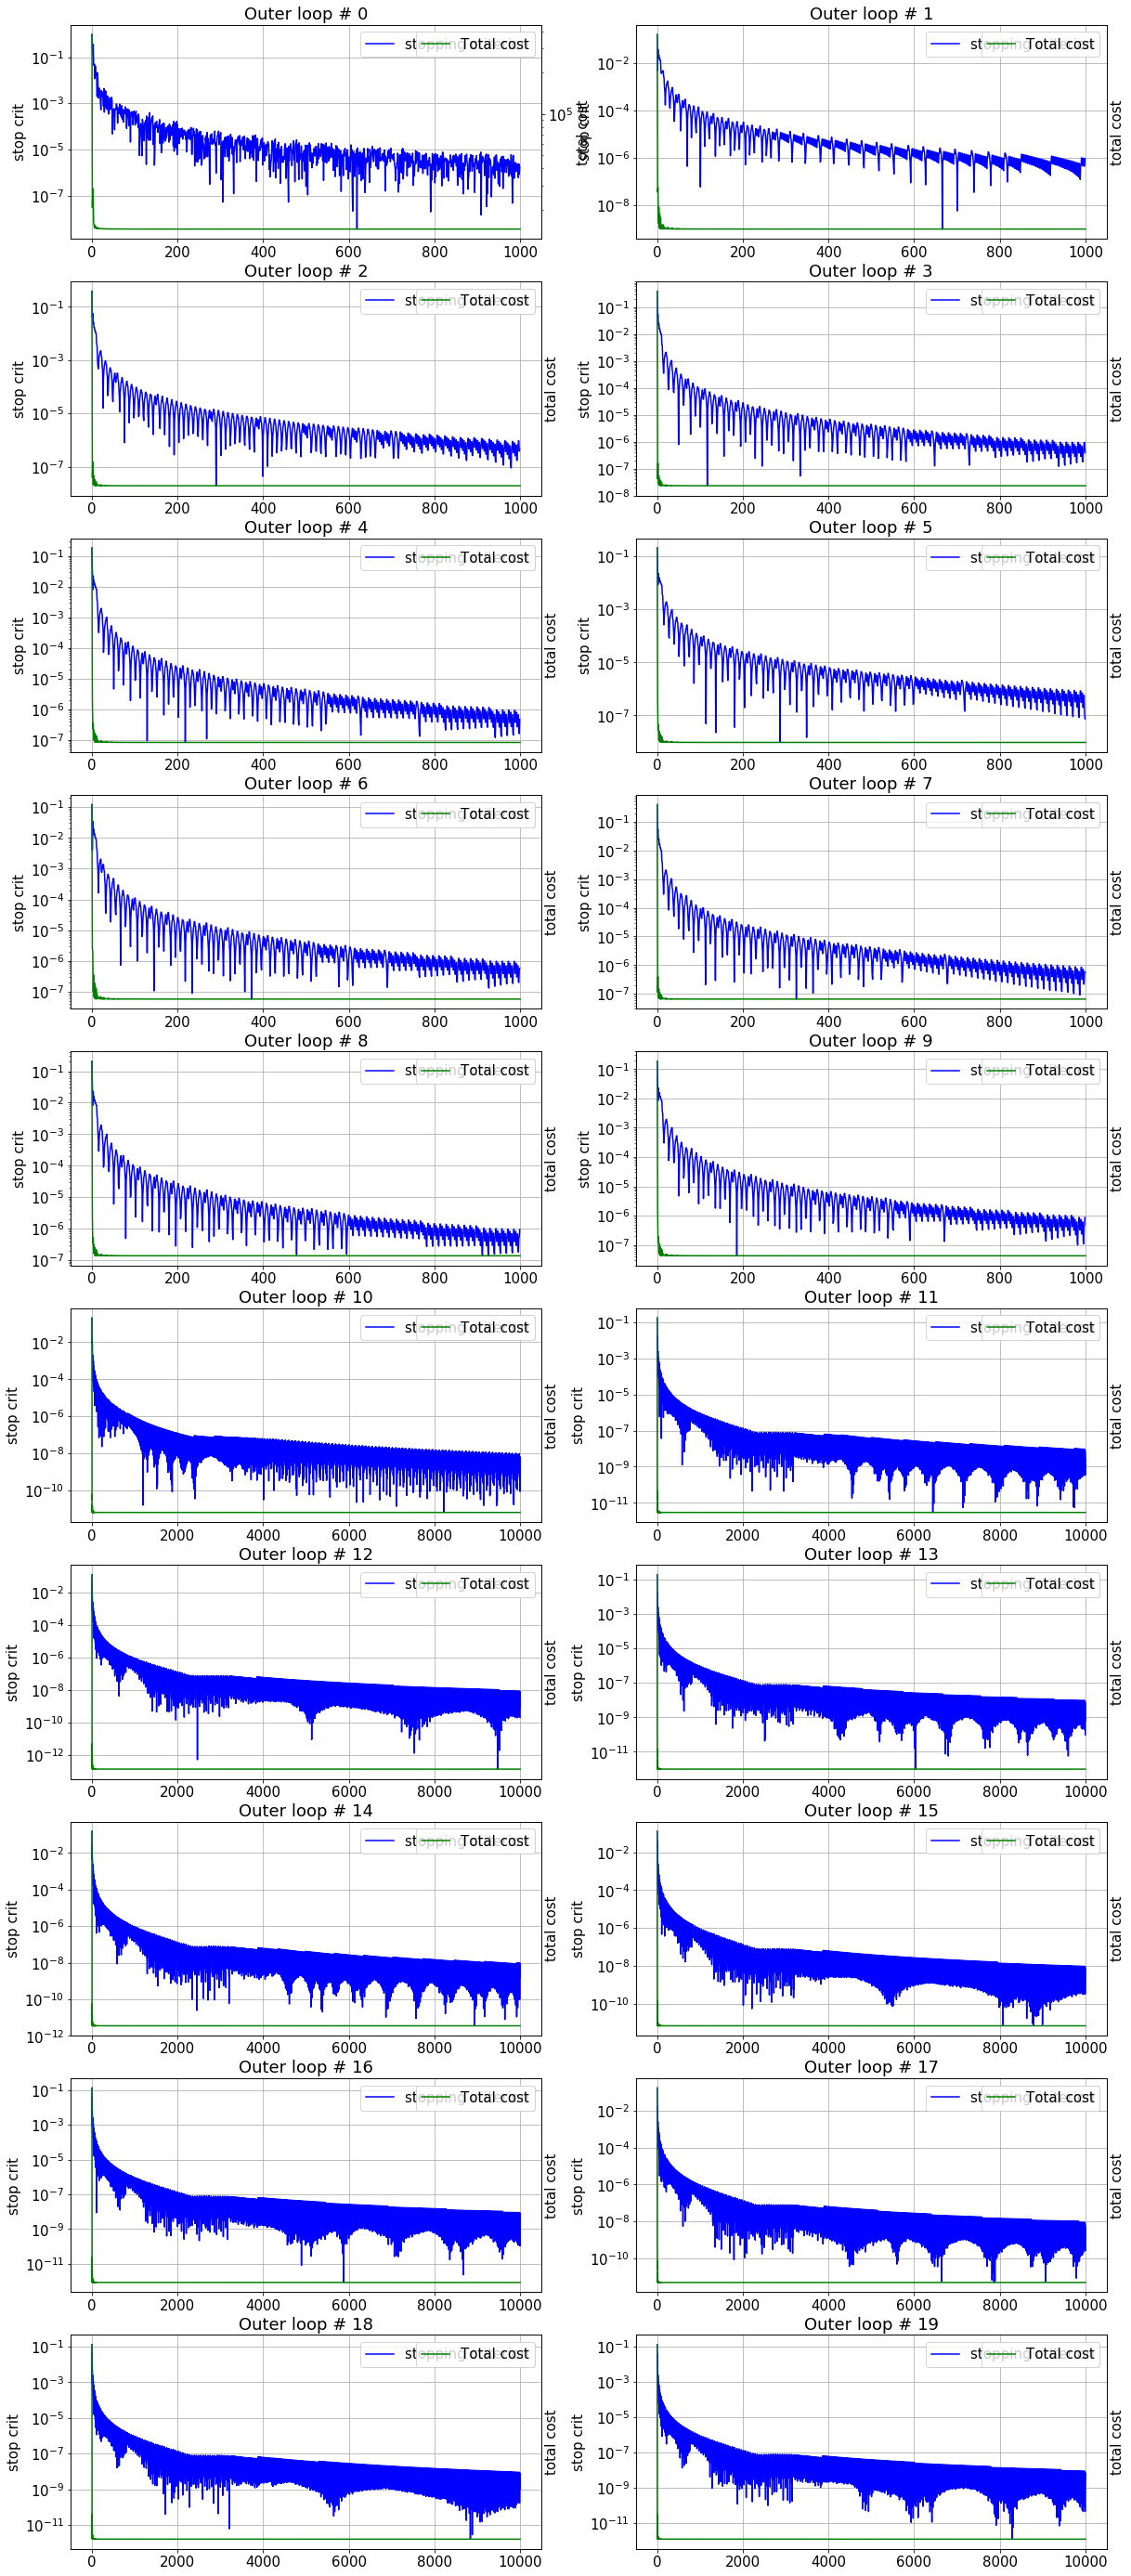

In [36]:
plot_stop_and_cost(opt_res)

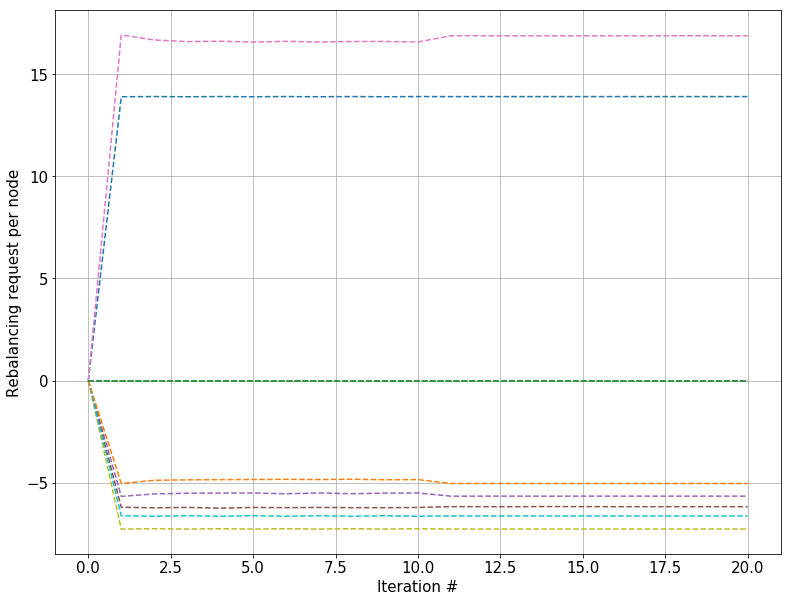

In [37]:
plot_ri_list(ri_FW, save = False, path = None)

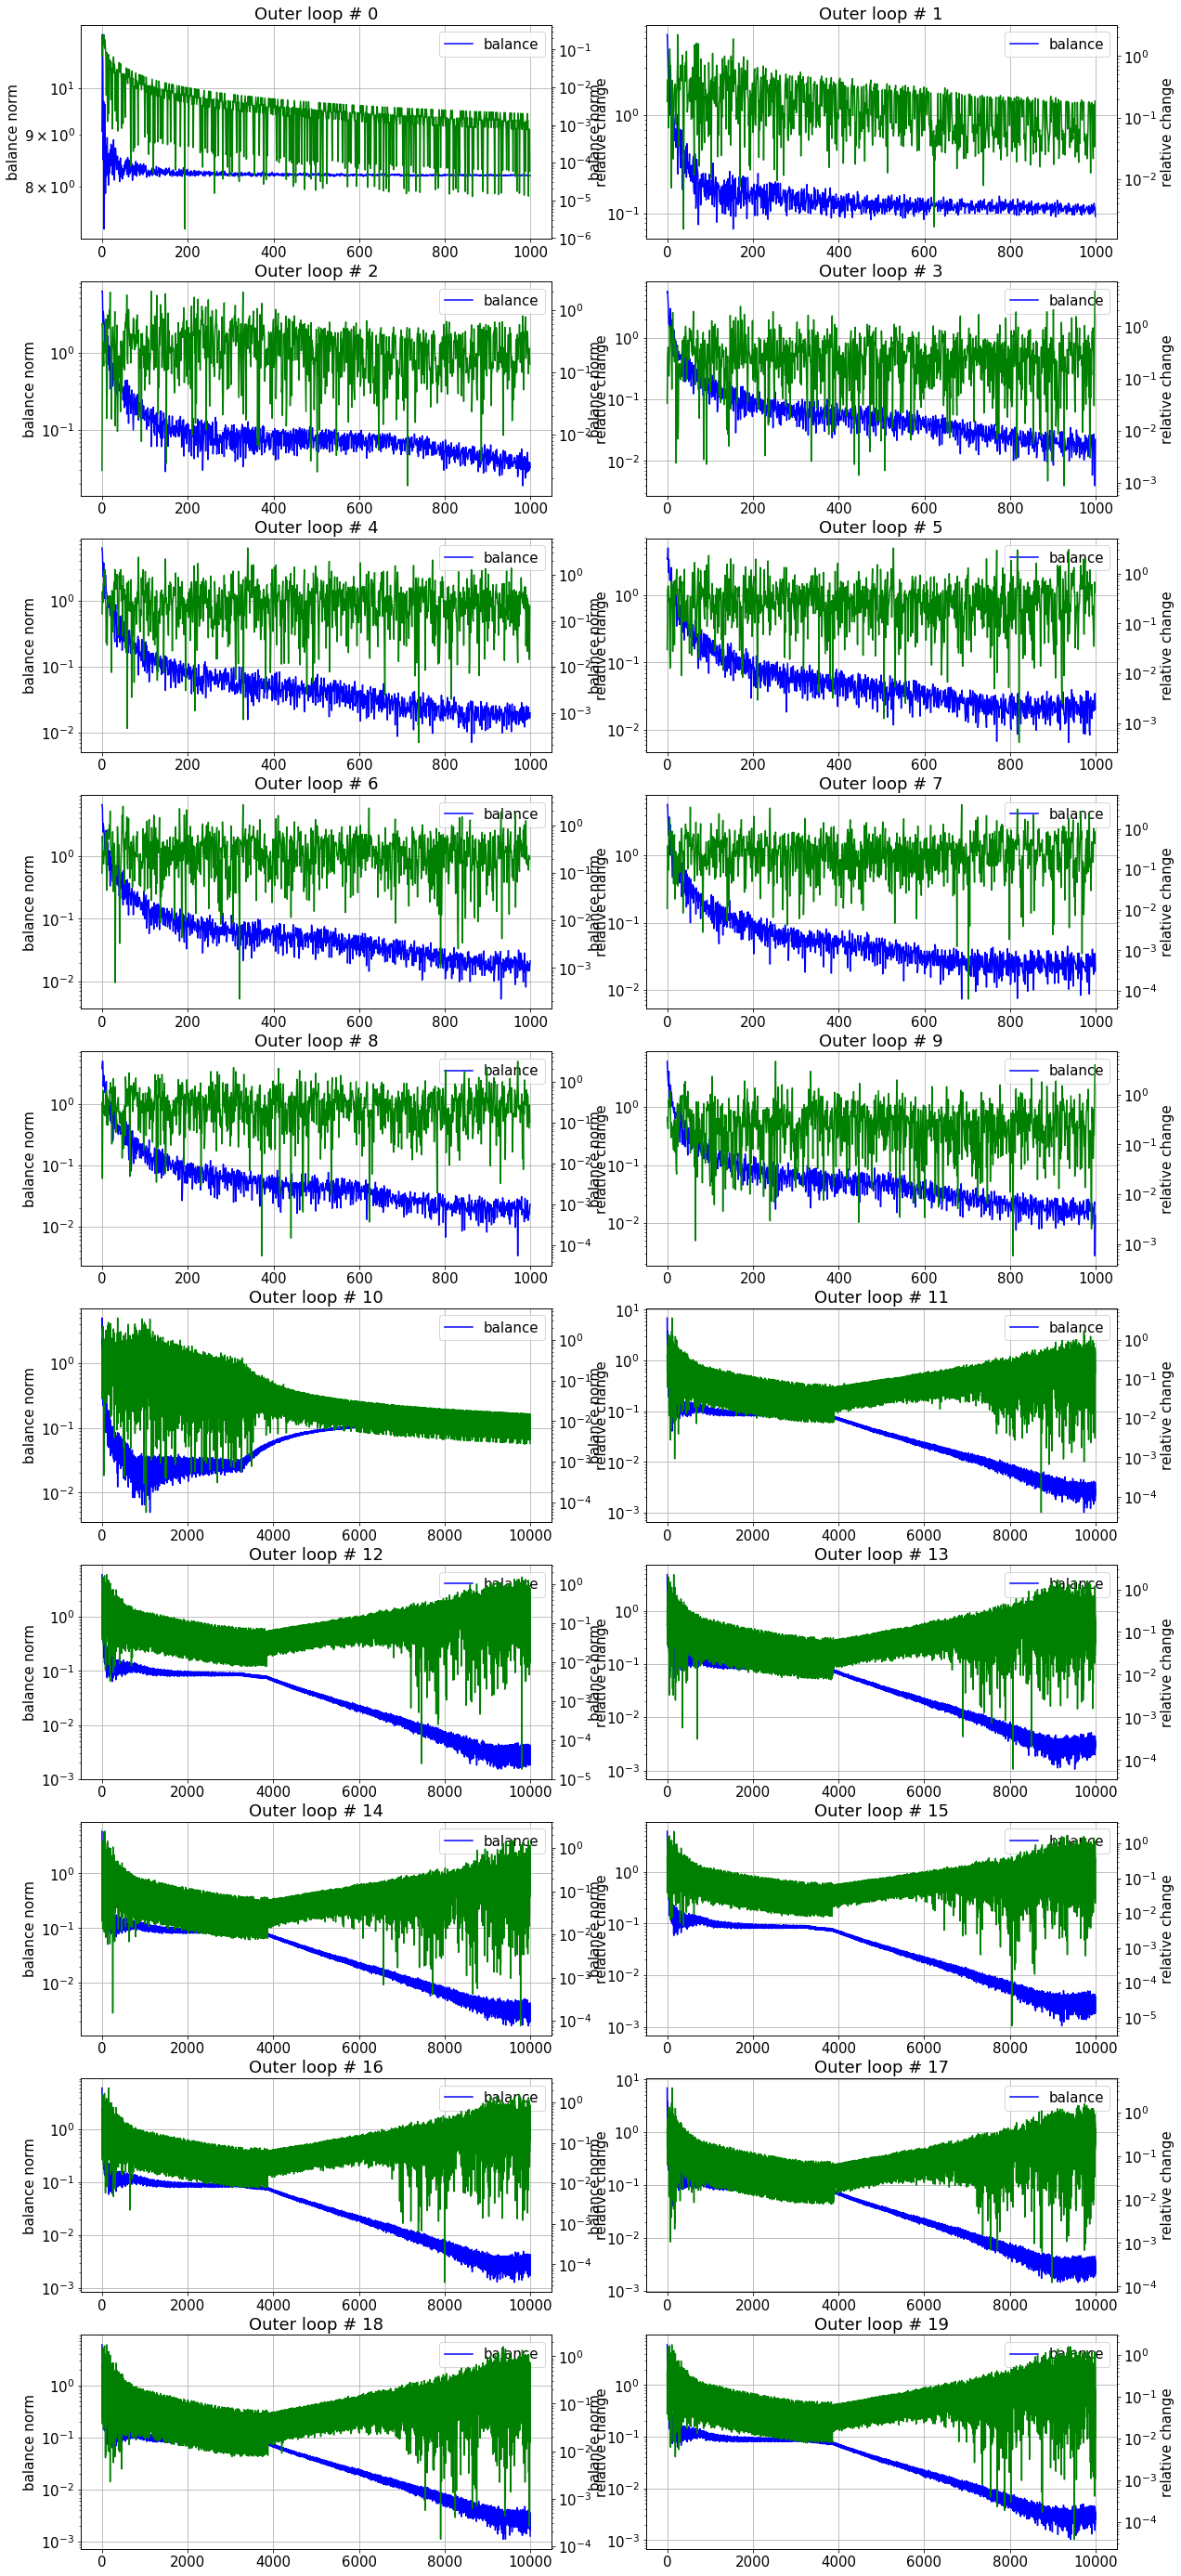

In [38]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

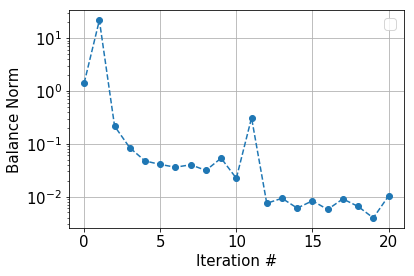

In [40]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## Comparison of those measures

ni_to_10000.pkl
initial_setup.pkl
ni_to_5000.pkl


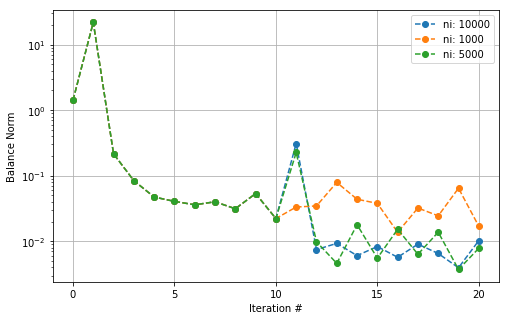

In [5]:
DATA_PATH = '/Users/lucasfuentes/ASL/ICU/notebooks/Data/'

sb = 'unstucking_balance'
path=os.path.join(DATA_PATH,'10Nodes/outputs/',sb)
plt.figure(figsize=(8,5))
for filename in os.listdir(path):


    if filename == 'new_init.pkl':
        continue
    print(filename)
    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
            if filename.startswith("initial"):
                ni=str(1000)
            else:
                ni=filename.split(".")[0].split("_")[-1]
            
    b=np.linalg.norm(balance, axis=1)
    plt.plot(np.array(b), 'o--', label="ni: "+ni)
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

# Change the initialization

In [53]:
n_nodes=10

In [54]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [56]:
print(os.listdir(path))

['new_init.pkl', 'ni_to_10000.pkl', 'initial_setup.pkl', 'ni_to_5000.pkl']


In [57]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

new_init.pkl


In [58]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

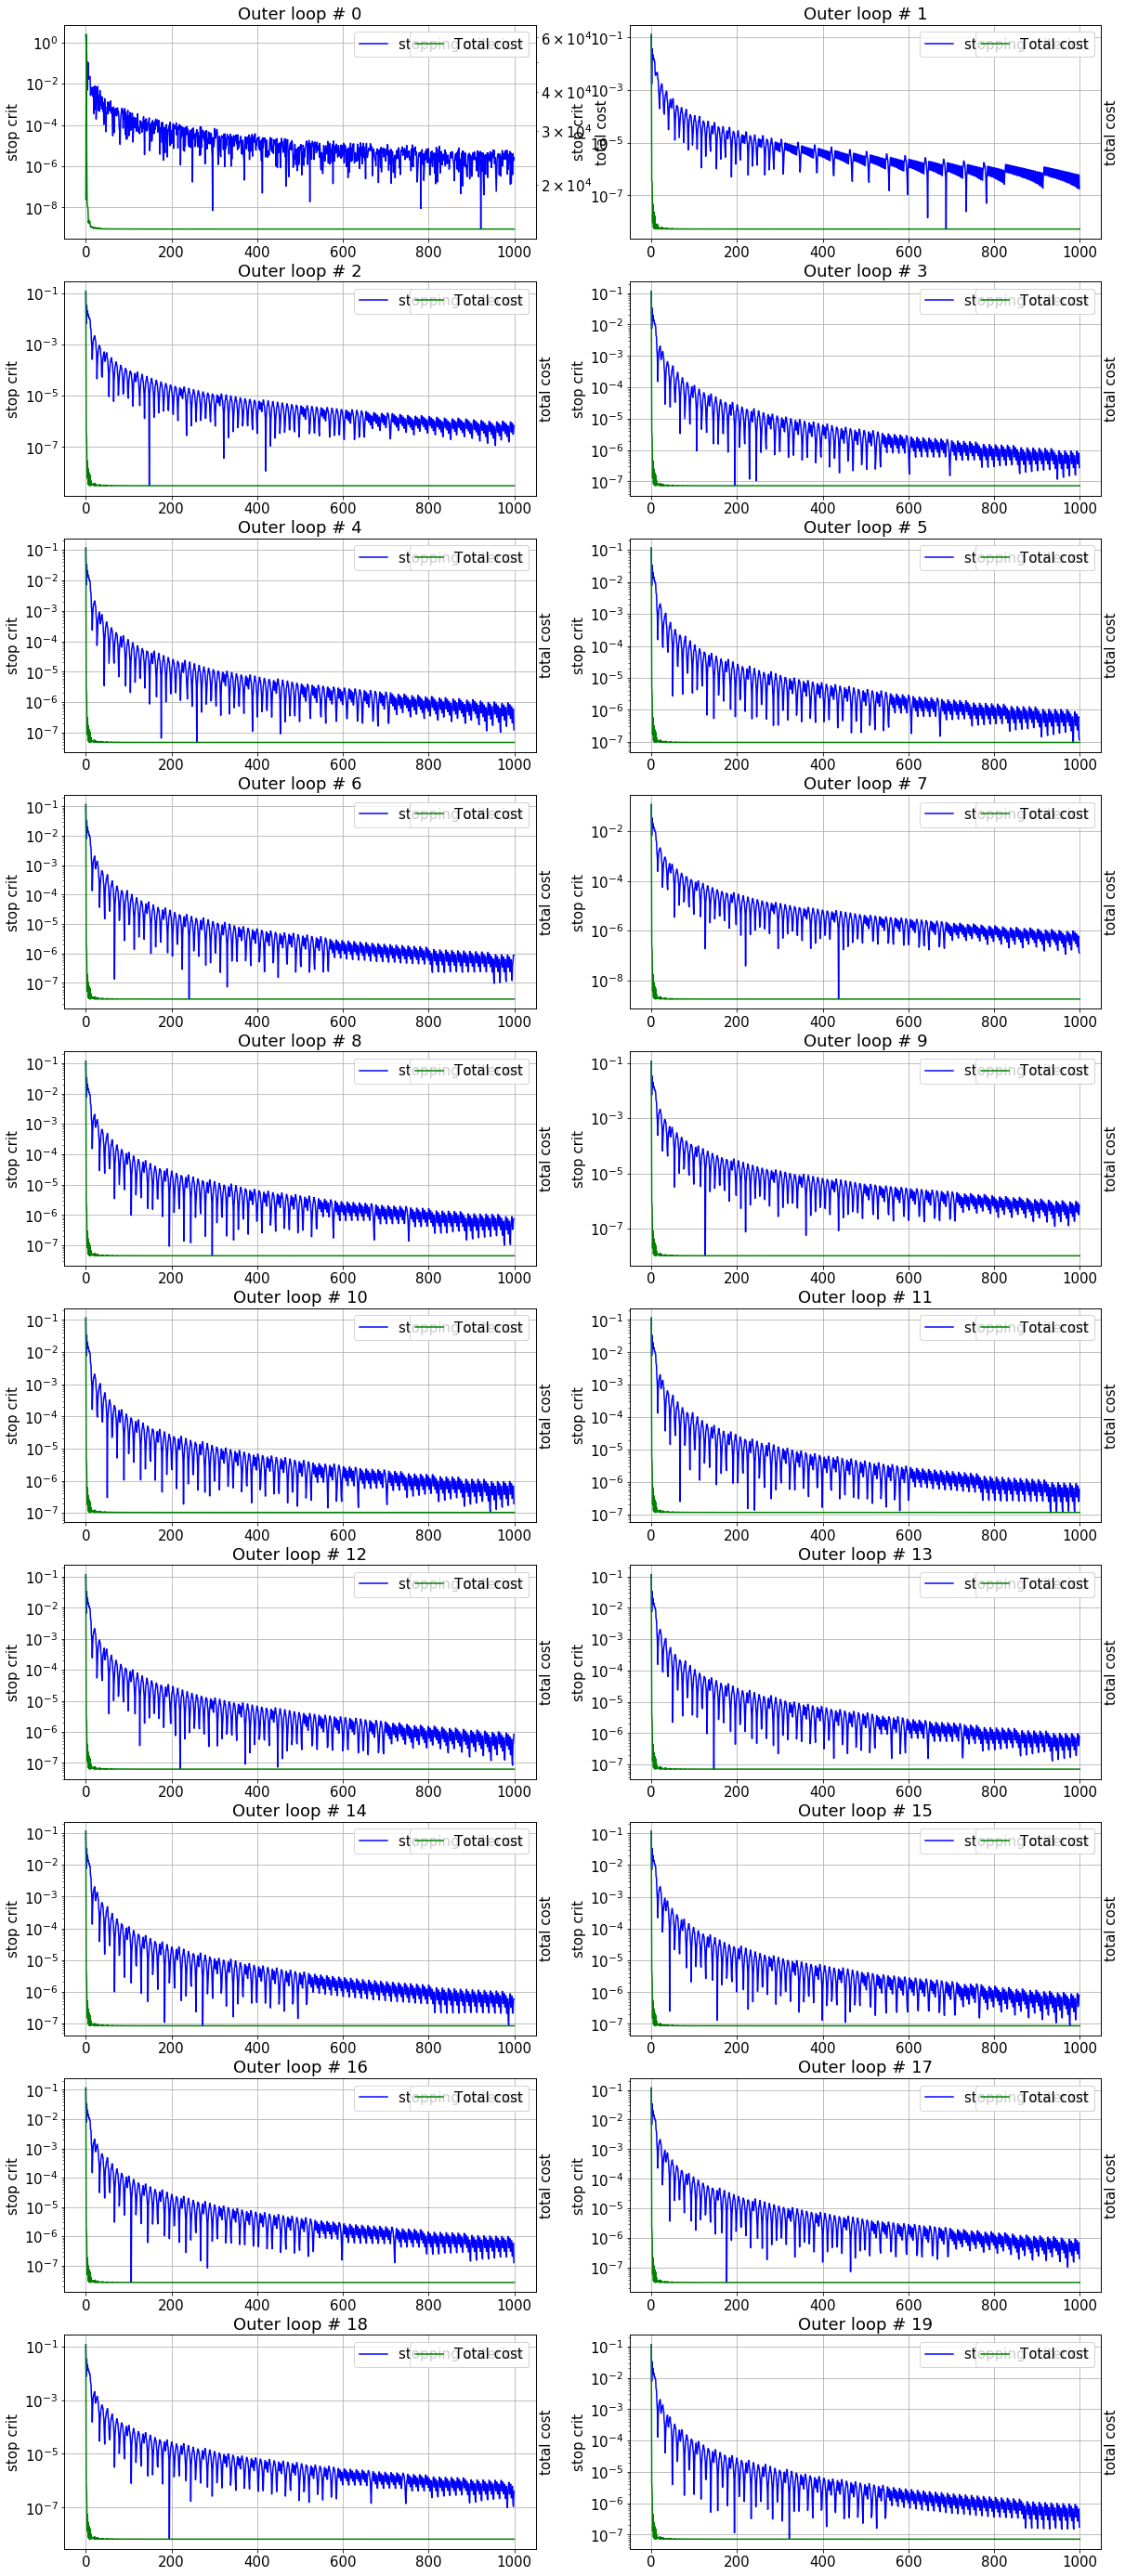

In [59]:
plot_stop_and_cost(opt_res)

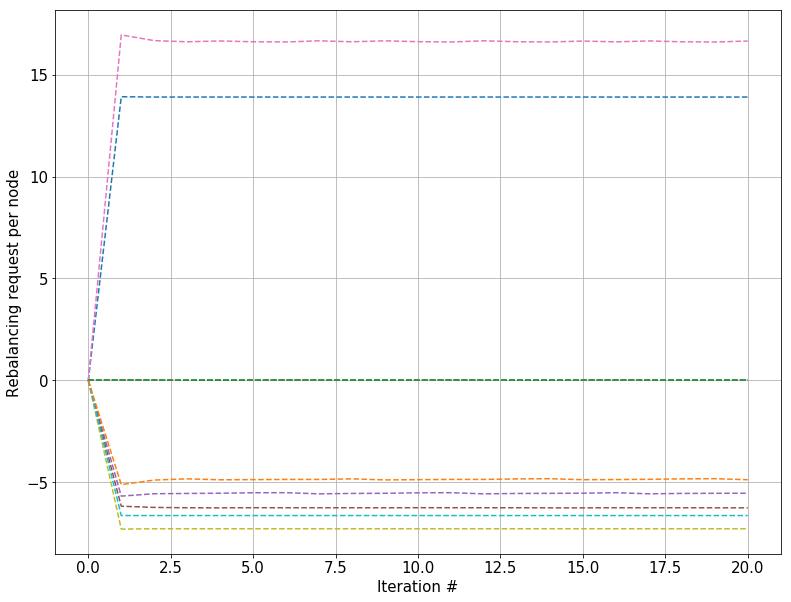

In [60]:
plot_ri_list(ri_FW, save = False, path = None)

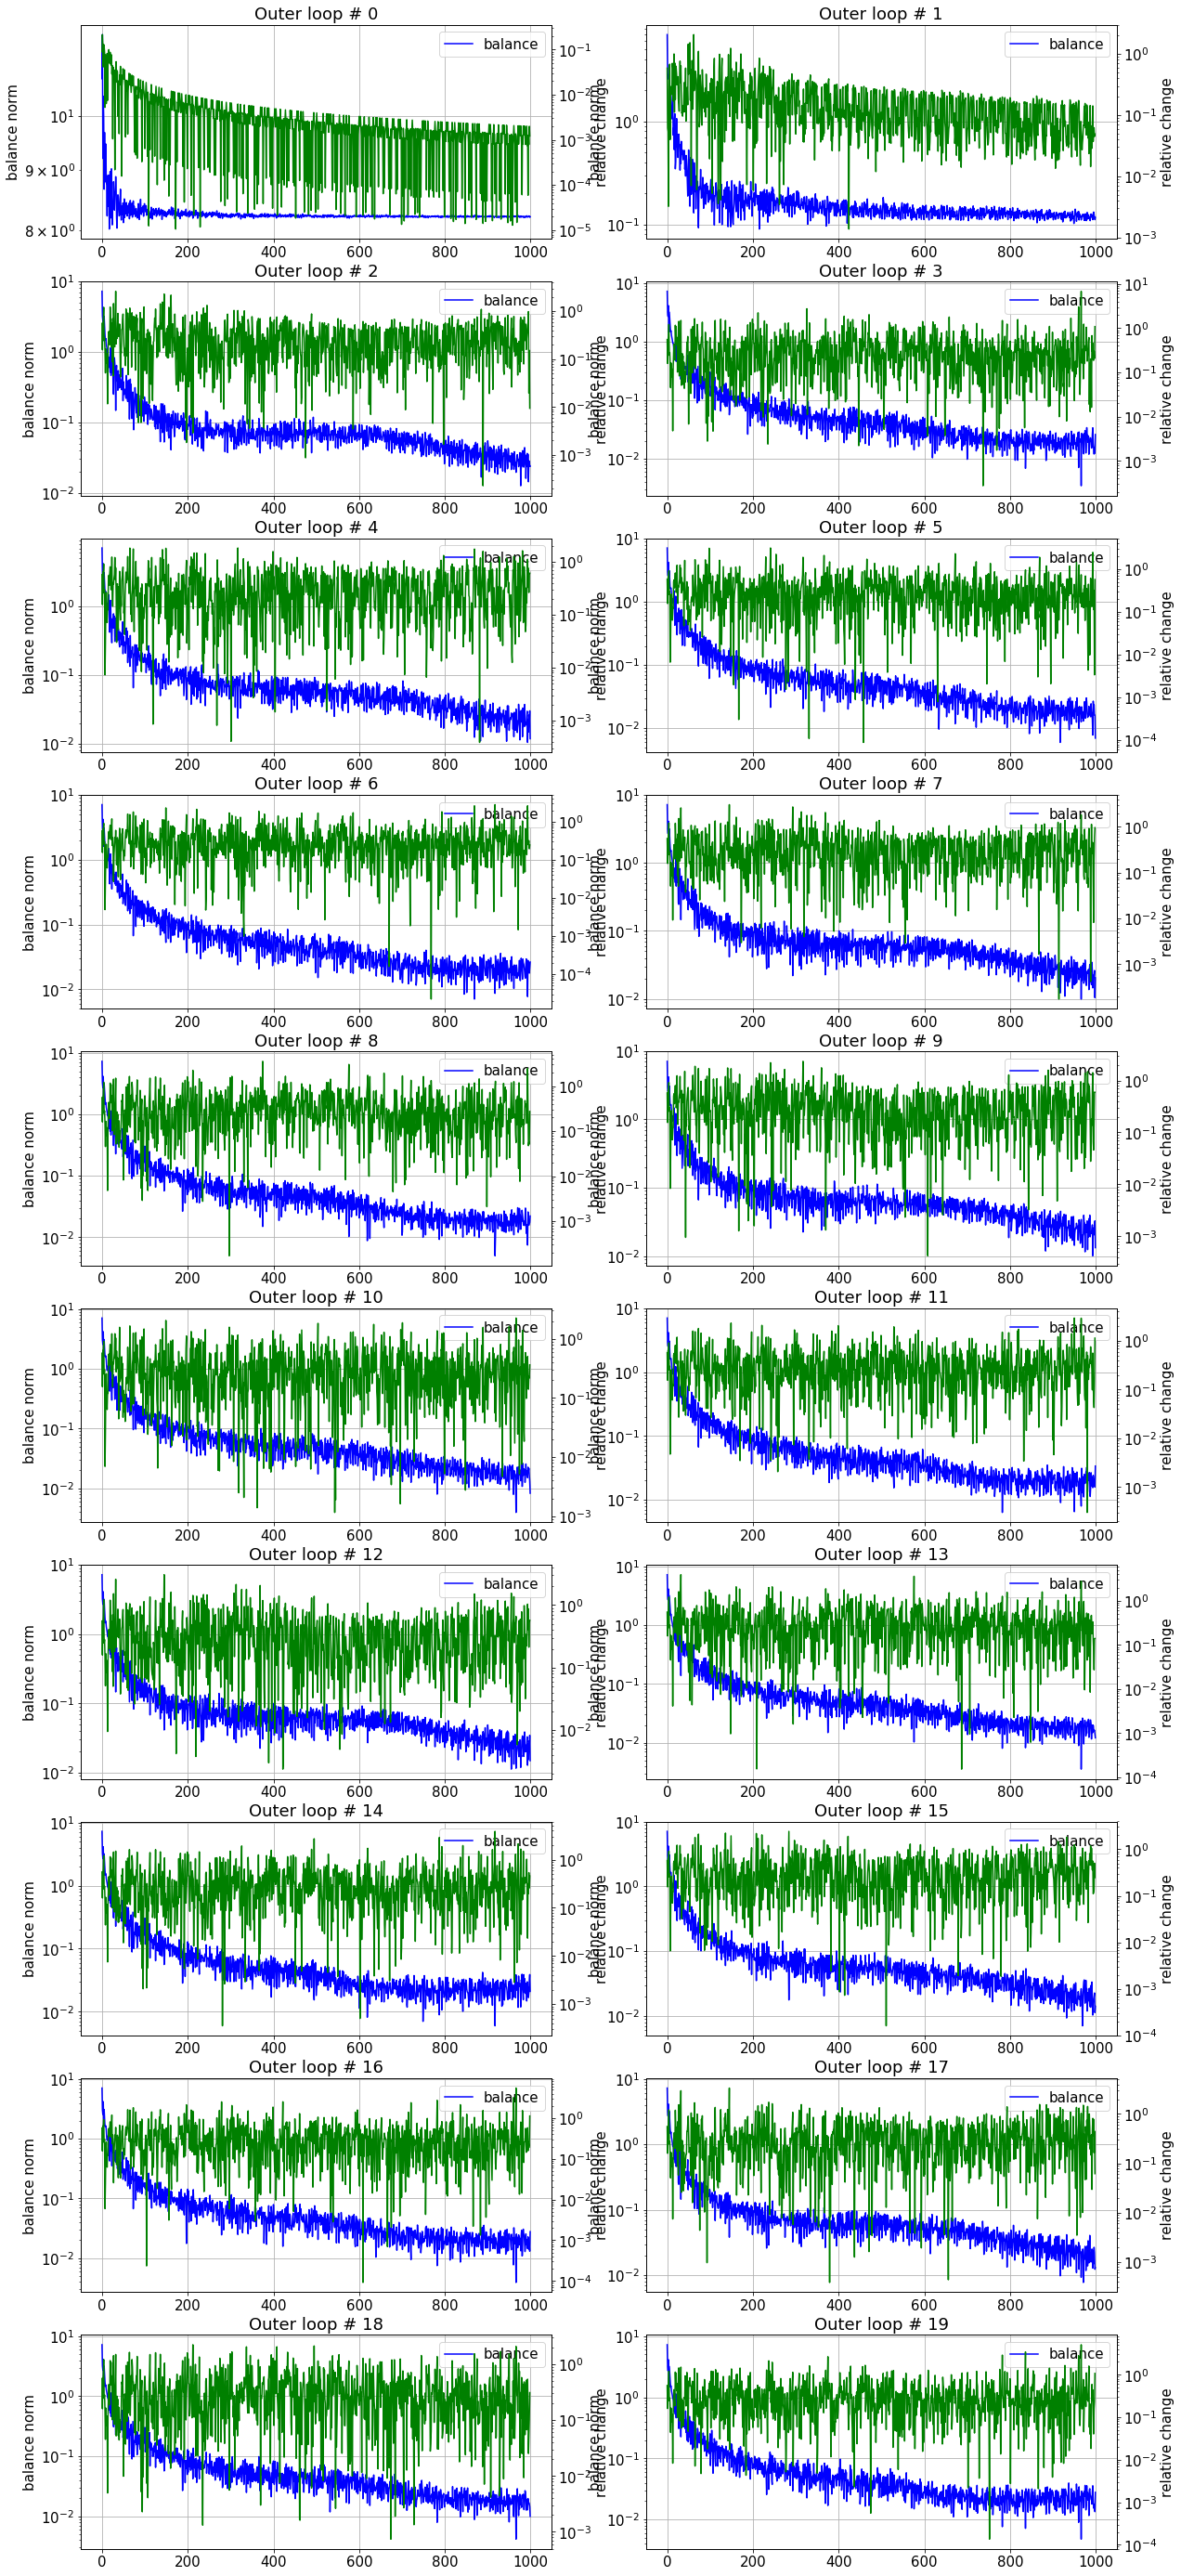

In [61]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

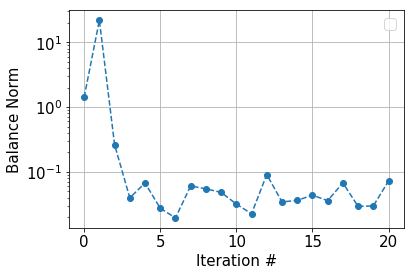

In [62]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [64]:
for e in G_FW[-1][0].edges():
    print(e, G_FW[-1][0][e[0]][e[1]]['f_m']+G_FW[-1][0][e[0]][e[1]]['f_r'])

('0', '1') 0.0
('0', '2') 7.272901296111663
('0', '3') 10.350807604584167
('0', '7') 6.624646061814549
('0', 'R') 24.24835496251038
('0', '0_p') 6.102452642073772
('1', '0') 10.350807604584167
('1', '4') 0.0
('2', '0') 7.272901296111663
('2', '6') 7.272901296111663
('3', '0') 10.350807604584167
('3', '9') 4.816450666186925
('3', '5_p') 5.53435693839722
('4', '1') 10.350807604584167
('4', '5') 6.245024920810851
('4', '8') 0.0
('4', '5_p') 6.245024920810857
('5', '4') 16.595832525395018
('5', 'R') 6.245024920810851
('5', '5_p') 13.404167474604971
('6', '2') 7.272901296111663
('6', '0_p') 7.272901296111663
('7', '0') 6.624646061814549
('7', '0_p') 6.624646061814549
('8', '4') 0.0
('9', '3') 4.816450666186925
('9', '5_p') 4.816450666186925


In [67]:
for e in G_FW[-1][-1].edges():
    print(e, G_FW[-1][-1][e[0]][e[1]]['f_m']+G_FW[-1][-1][e[0]][e[1]]['f_r'])

('0', '1') 12.357449575461631
('0', '2') 7.272901296111663
('0', '3') 10.397467504167698
('0', '7') 6.624646061814549
('0', 'R') 13.91872257615639
('0', '0_p') 6.102452642073772
('1', '0') 12.425284693275358
('1', '4') 12.357449575461631
('2', '0') 7.272901296111661
('2', '6') 7.272901296111663
('3', '0') 10.350807604584174
('3', '9') 4.867417645130653
('3', '5_p') 5.530049859037046
('4', '1') 12.425284693275358
('4', '5') 16.57465730716485
('4', '8') 0.0
('4', '5_p') 6.2459222315108445
('5', '4') 16.643389735678557
('5', 'R') 16.57465730716485
('5', '5_p') 13.356610264321446
('6', '2') 7.272901296111661
('6', '0_p') 7.272901296111663
('7', '0') 6.624646061814553
('7', '0_p') 6.624646061814549
('8', '4') 0.0
('9', '3') 4.816450666186922
('9', '5_p') 4.867417645130653


## Comparing two measures

new_init.pkl
initial_setup.pkl


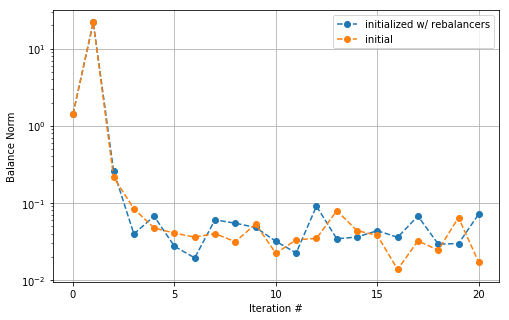

In [6]:
DATA_PATH = '/Users/lucasfuentes/ASL/ICU/notebooks/Data/'

sb = 'unstucking_balance'
path=os.path.join(DATA_PATH,'10Nodes/outputs/',sb)
plt.figure(figsize=(8,5))
for filename in os.listdir(path):


    if filename.startswith("ni"):
        continue
    print(filename)
    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
            if filename.startswith("initial"):
                label="initial"
            else:
                label="initialized w/ rebalancers"
            
    b=np.linalg.norm(balance, axis=1)
    plt.plot(np.array(b), 'o--', label=label)
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')